## Based on https://github.com/raghakot/keras-vis/blob/master/examples/vggnet/activation_maximization.ipynb

In [1]:
from keras.models import load_model
import numpy as np

model = load_model('whale.flukes.4250_classes.weights.best.hdf5')
train_classes = np.load('train_classes.npy')

num_classes = len(train_classes) 

Using TensorFlow backend.


In [2]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

# Dense Layer Visualizations
We need to switch the softmax activation out for linear

In [3]:
from vis.utils import utils
from keras import activations

# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'dense_3')

# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

## Visualize prediction layer of 20 random whales

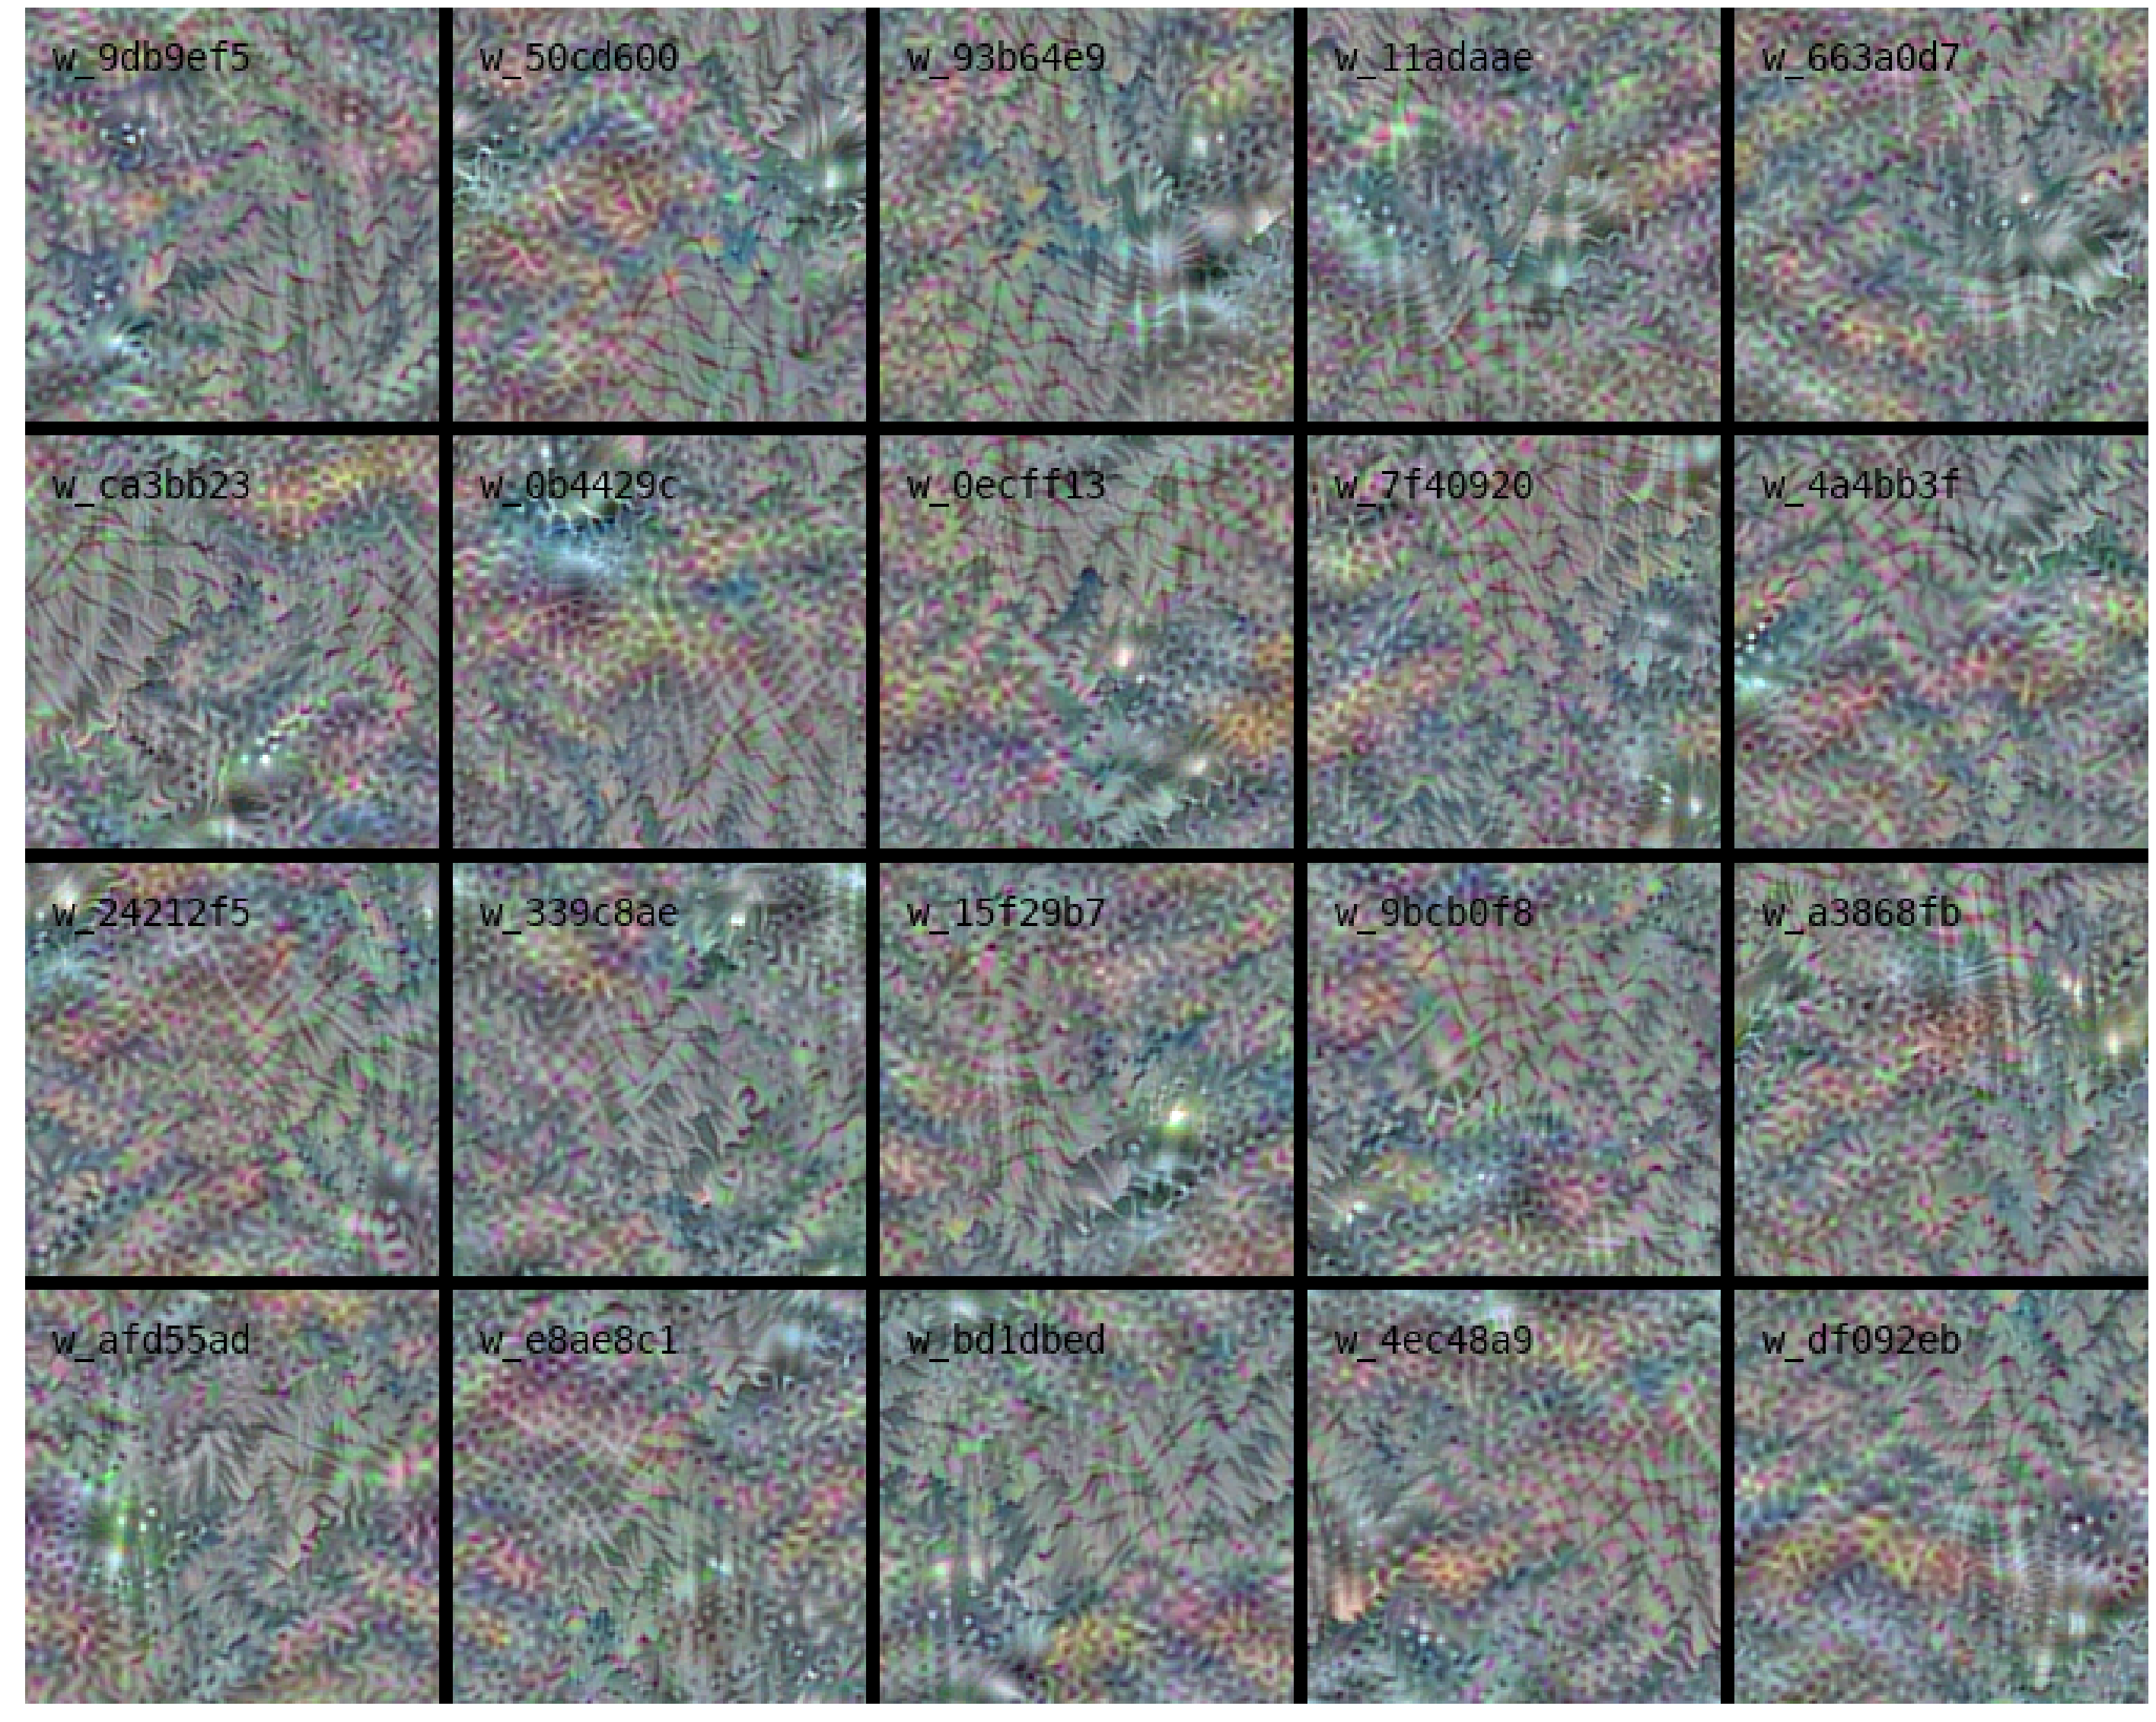

In [4]:
import numpy as np
from vis.utils import utils
from vis.input_modifiers import Jitter
from vis.visualization import visualize_activation
from matplotlib import pyplot as plt
from matplotlib import font_manager as font_manager

# rebuild matplotlib fomt cache
font_manager._rebuild()

categories = np.random.permutation(num_classes)[:20]

vis_images = []
image_modifiers = [Jitter(16)]
for idx in categories:    
    img = visualize_activation(model, layer_idx, filter_indices=idx, 
                               max_iter=500, input_modifiers=image_modifiers)
    
    # Reverse lookup of whale id and overlay it on the image.
    img = utils.draw_text(img, train_classes[idx], font="VeraMono.ttf")
    vis_images.append(img)

# Generate stitched images with 5 cols (so it will have 3 rows).
plt.rcParams['figure.figsize'] = (50, 50)
stitched = utils.stitch_images(vis_images, cols=5)
plt.axis('off')
plt.imshow(stitched)
plt.show()